In [184]:
# Importación de Librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats

#from sinfo import sinfo

%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.close('all')

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import decomposition

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from IPython.display import Image
from sklearn.preprocessing import RobustScaler

# <div style="padding:20px;color:orange;margin:0;font-size:40px;font-family:Merriweather serif;text-align:center;display:fill;border-radius:5px;background-color:black;overflow:hidden"><b>Conjunto de datos Globales de Migrantes Desaparecidos </b></div> <div style="padding:15px;color:orange;margin:0;font-size:30px;font-family:Merriweather serif;text-align:center;display:fill;border-radius:5px;background-color:black;overflow:hidden"><b>Comprendiendo a los Migrantes Desaparecidos y Sus Trágicos Viajes </b></div> 
<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fthumbs.dreamstime.com%2Fb%2Frefugees-60289996.jpg&f=1&nofb=1&ipt=bb053e7c0f77b6e58ee8413c561b019a91b9775b6ad57a1b2481614b3e40796d&ipo=images" alt="Descripción de la imagen" width="600"></center>

#### <span style="color:orange">Este conjunto de datos proporciona un registro completo de migrantes desaparecidos y sus trágicos viajes hacia destinos internacionales, recopilado por el Proyecto Migrantes Desaparecidos, una iniciativa implementada por la Organización Internacional para las Migraciones (OIM) desde 2014. El conjunto de datos documenta muertes y desapariciones, arrojando luz sobre los desafíos que enfrentan los migrantes durante sus viajes. Tenga en cuenta que, debido a las complejidades en la recopilación de datos, las cifras presentadas probablemente sean inferiores a la realidad. El conjunto de datos sirve como un tributo a las personas que perdieron la vida, así como a las familias y comunidades afectadas por su ausencia. </span>

### <span style="color:orange">DATASET:<span> 

**Incident Type:** Tipo de incidente migratorio

**Incident Year:** Año en que ocurrió el incidente

**Reported Month:** Mes en que se reportó el incidente

**Region of Origin:** Región geográfica de donde originaron los migrantes

**Region of Incident:** Región geográfica donde ocurrió el incidente

**Country of Origin:** País de donde originaron los migrantes

**Number of Dead:** Número de migrantes fallecidos confirmados

**Minimum Estimated Number of Missing:** Recuento mínimo estimado de migrantes desaparecidos

**Total Number of Dead and Missing:** Recuento total de migrantes fallecidos y desaparecidos

**Number of Survivors:** Número de migrantes que sobrevivieron al incidente

**Number of Females:** Número de mujeres migrantes involucradas

**Number of Males:** Número de hombres migrantes involucrados

**Number of Children:** Número de niños migrantes involucrados

**Cause of Death:** Causa de muerte de los migrantes

**Migration Route:** Ruta tomada por los migrantes durante su viaje (si está disponible)

**Location of Death:** Ubicación aproximada donde ocurrió el incidente

**Information Source:** Fuente de información sobre el incidente

**Coordinates:** Coordenadas geográficas de la ubicación del incidente

**UNSD Geographical Grouping:** Agrupación geográfica según la División de Estadísticas de las Naciones Unidas

### <span style="color:orange">CONTEXTO COMERCIAL: <span> 
La Organización Internacional para las Migraciones (OIM) realiza y apoya investigaciones diseñadas para orientar y conformar las políticas y prácticas migratorias.

La producción de datos y la investigación se llevan a cabo para mejorar la provisión de los programas de la OIM y contribuir a una mayor comprensión de los procesos y patrones sobre la migración, y también de los vínculos entre la investigación migratoria y las políticas y prácticas sobre migración. La investigación también sirve para alimentar de manera directa el rol de la OIM como entidad que publica hallazgos de investigación aplicada, incluyendo las publicaciones principales de la Organización, el Informe Mundial sobre Migración, documentos publicados en la Serie Investigaciones sobre la Migración, y en los Perfiles de la OIM sobre Migración. 

### <span style="color:orange">DEFINCION DE OBJETIVO:<span> 
Poder predecir el Nro Total Fallecidos y Desaparecidos ante nuevos casos de migración que entren al modelo de ML a implementar.

### <span style="color:orange">CONTEXTO ANALITICO<span> 
Analizar un conjunto de datos tan significativo y sensible como el de migrantes desaparecidos y sus trágicos viajes puede ofrecer insights valiosos y servir para múltiples propósitos, desde la identificación de patrones y tendencias hasta la formulación de políticas que mejoren la seguridad de los migrantes. 

Posibles ejemplos:

- Análisis Descriptivo. Objetivo: Entender la distribución general y las características de los datos.

- Análisis de Tendencias Temporales. Objetivo: Identificar patrones y cambios a lo largo del tiempo.

- Análisis de Factores de Riesgo. Objetivo: Identificar factores que aumentan el riesgo de muerte o desaparición.

Este proyecto aborda una pequeña muestra de lo que se puede analizar.

In [185]:
# Iniciamos cargando el archivo a un Dataframe y mostramos las primeras 5 filas
url = 'https://raw.githubusercontent.com/johnhigers/DataAnalisisScience/main/Global%20Missing%20Migrants%20Dataset.csv'
df  = pd.read_csv(url, sep=',')
df.head(4)

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America
3,Incident,2014,January,Central America,North America,Mexico,1.0,0,1,0,0,1,0,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America


In [186]:
# Listamos los nombres de las columnas (atributos)
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

Los nombres de columnas vienen en inglés y algunos son muy largos y poco claros, por lo tanto, los cambiaremos a español y abreviando lo más posible.

In [187]:
# Renombrado de columnas
df.columns=['Tipo Incidente','Año Incidente','Mes Reportado','Región Origen','Región Incidente','País Origen','Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOBInc','Nro Mujeres','Nro Hombres','Nro Niños','Causa FA','Ruta Migratoria','Ubicación FA','Fte Información','Coordenadas','Agr Geográfica']
df.columns

Index(['Tipo Incidente', 'Año Incidente', 'Mes Reportado', 'Región Origen',
       'Región Incidente', 'País Origen', 'Nro FA', 'Mín Estimado DES',
       'Nro Total FAyDES', 'Nro SOBInc', 'Nro Mujeres', 'Nro Hombres',
       'Nro Niños', 'Causa FA', 'Ruta Migratoria', 'Ubicación FA',
       'Fte Información', 'Coordenadas', 'Agr Geográfica'],
      dtype='object')

In [188]:
# Mostramos las últimas 4 filas
df.tail(4)

,Tipo Incidente,Año Incidente,Mes Reportado,Región Origen,Región Incidente,País Origen,Nro FA,Mín Estimado DES,Nro Total FAyDES,Nro SOBInc,Nro Mujeres,Nro Hombres,Nro Niños,Causa FA,Ruta Migratoria,Ubicación FA,Fte Información,Coordenadas,Agr Geográfica
13016,Incident,2023,July,Western Africa (P),Western Asia,Unknown,2.0,0,2,0,0,2,0,Vehicle accident / death linked to hazardous t...,Türkiye-Europe land route,"At the Kapıkule Türkiye-Bulgaria Border Gate, ...","Son Dakika, Hurriyet","41.71697242, 26.351489",Western Asia
13017,Incident,2023,July,Western Africa,Northern Africa,Senegal,13.0,0,13,6,0,0,0,Drowning,Western Africa / Atlantic route to the Canary ...,"Off the coasts of Dakhla, Western Sahara - 6 s...","Barron's News, InfoMigrants, IOM Morrocco","23.72836078, -15.901632",Uncategorized
13018,Incident,2023,July,Mixed,Northern Africa,Unknown,6.0,0,6,48,0,0,0,Drowning,Western Africa / Atlantic route to the Canary ...,"Unspecified location off the coast of Nador, M...","El Nashra, Swiss Info; CGTN, IOM Morrocco","35.17187365, -2.903182",Uncategorized
13019,Incident,2023,July,Western Africa (P),Western Africa,Unknown,16.0,37,53,2,2,0,0,Drowning,Western Africa / Atlantic route to the Canary ...,"Off the coast of Ouakam, Dakar, Senegal",IOM Senegal,"14.71870705, -17.506255",Uncategorized


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tipo Incidente    13020 non-null  object 
 1   Año Incidente     13020 non-null  int64  
 2   Mes Reportado     13020 non-null  object 
 3   Región Origen     12998 non-null  object 
 4   Región Incidente  13020 non-null  object 
 5   País Origen       13012 non-null  object 
 6   Nro FA            12470 non-null  float64
 7   Mín Estimado DES  13020 non-null  int64  
 8   Nro Total FAyDES  13020 non-null  int64  
 9   Nro SOBInc        13020 non-null  int64  
 10  Nro Mujeres       13020 non-null  int64  
 11  Nro Hombres       13020 non-null  int64  
 12  Nro Niños         13020 non-null  int64  
 13  Causa FA          13020 non-null  object 
 14  Ruta Migratoria   9999 non-null   object 
 15  Ubicación FA      13020 non-null  object 
 16  Fte Información   13012 non-null  object

### <span style="color:orange">Preprocesamiento de datos / Limpieza de datos (Data Cleaning) <span>

In [190]:
# Verificamos si vienen datos faltantes
df.isnull().values.any()

True

<span style="color:yellow">Manejo de Datos Faltantes: Imputación o eliminación de valores perdidos.</span>

In [191]:
# Determinamos cantidad de datos faltantes por cada atributo
df.isnull().sum()

Tipo Incidente         0
Año Incidente          0
Mes Reportado          0
Región Origen         22
Región Incidente       0
País Origen            8
Nro FA               550
Mín Estimado DES       0
Nro Total FAyDES       0
Nro SOBInc             0
Nro Mujeres            0
Nro Hombres            0
Nro Niños              0
Causa FA               0
Ruta Migratoria     3021
Ubicación FA           0
Fte Información        8
Coordenadas           36
Agr Geográfica         1
dtype: int64

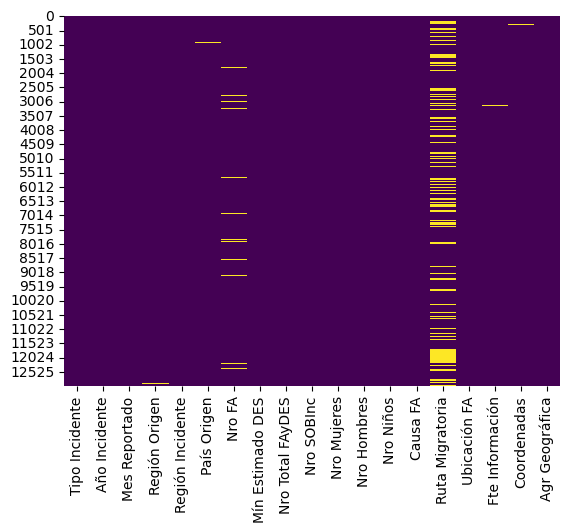

In [192]:
# Visualizamos la distribución de datos faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [193]:
# Revisamos tamaño del DataSet (filas,columnas)
df.shape

(13020, 19)

In [194]:
# Determinamos Cantidad de valores faltantes por cada atributo y su porcentaje respecto al total de filas
dfNaN = pd.DataFrame({'NroFilasNull' : df.isnull().sum(), 'PorcentajeTotalFilas' : ((df.isnull().sum()) / (len(df)) * (100)).round(2) }) 
dfNaN[dfNaN["NroFilasNull"]>=1].sort_values(by=["NroFilasNull"], ascending=[False])

,NroFilasNull,PorcentajeTotalFilas
Ruta Migratoria,3021,23.20
Nro FA,550,4.22
Coordenadas,36,0.28
Región Origen,22,0.17
País Origen,8,0.06
Fte Información,8,0.06
Agr Geográfica,1,0.01


In [195]:
# Eliminamos Atributo que supera el 18% de datos faltantes
df = df.drop("Ruta Migratoria", axis=1)  # Elimina columna 
# Ahora nos queda 18 columnas después de eliminar
df.shape

(13020, 18)

<span style="color:yellow">
Dado que los datos faltantes que quedan son pocos (menos del 5% por columna), se opta por: Imputación de datos faltantes

Ventajas:
- Preserva todas las observaciones.
- Reduce el sesgo introducido por datos faltantes.</span>

In [196]:
# Asignamos valores por defecto para llenar los datos faltantes
df['Región Origen']  = df['Región Origen'].fillna('Unknown')
df['Nro FA']    = df['Nro FA'].fillna(0)
df['País Origen'] = df['País Origen'].fillna('Unknown')
df['Fte Información']   = df['Fte Información'].fillna('Unknown')
df['Coordenadas']   = df['Coordenadas'].fillna('00.0000,00.0000')
df['Agr Geográfica']   = df['Agr Geográfica'].fillna('Unknown')

In [197]:
# Veamos si quedan datos faltantes
df.isnull().values.any()

False

<span style="color:yellow">Corrección de Errores: Rectificación de datos incorrectos o inconsistentes.</span>

In [198]:
df.describe().T.style.set_properties(**{'background-color': 'black','color': 'white','border-color': 'grey'}).format(precision=2)

,count,mean,std,min,25%,50%,75%,max
Año Incidente,13020.00,2019.06,2.42,2014.00,2017.00,2019.00,2021.00,2023.00
Nro FA,13020.00,2.51,9.54,0.00,1.00,1.00,2.00,750.00
Mín Estimado DES,13020.00,1.90,15.65,-2.00,0.00,0.00,0.00,750.00
Nro Total FAyDES,13020.00,4.42,19.95,1.00,1.00,1.00,2.00,1022.00
Nro SOBInc,13020.00,6.55,42.32,-2.00,0.00,0.00,0.00,1950.00
Nro Mujeres,13020.00,0.46,2.85,0.00,0.00,0.00,0.00,94.00
Nro Hombres,13020.00,1.12,3.81,0.00,0.00,1.00,1.00,135.00
Nro Niños,13020.00,0.24,2.42,0.00,0.00,0.00,0.00,250.00


<span style="color:yellow">Se observa que hay valores minimos negativos en campos: "Mín Estimado DES" y en "Nro SOBInc". Contamos filas con negativos</span>

In [199]:
n_rows_neg = ( (df["Mín Estimado DES"] < 0) | (df["Nro SOBInc"] < 0) ).sum()
print(f"Nro Filas con negativos en 'Mín Estimado DES' or 'Nro SOBInc': {n_rows_neg}")

Nro Filas con negativos en 'Mín Estimado DES' or 'Nro SOBInc': 9


<span style="color:yellow">Creamos lista con el indice de filas con valores negativos y mostramos las filas afectadas<span>

In [200]:
listIndex = df.index[ (df["Mín Estimado DES"] < 0) | (df["Nro SOBInc"] < 0)].tolist()
df[ ["Mín Estimado DES","Nro SOBInc"] ].loc[listIndex]

,Mín Estimado DES,Nro SOBInc
601,-1,1
806,-2,0
858,-1,274
1247,56,-1
7794,0,-1
7796,0,-1
7800,0,-1
7889,0,-2
10422,-1,0


<span style="color:yellow">Sobre las filas afectadas, asignamos 0 a los casos negativos de lo contrario mantenemos el valor.<span>

In [201]:
df["Mín Estimado DES"] = np.where( (df["Mín Estimado DES"] < 0), 0, df["Mín Estimado DES"] )
df["Nro SOBInc"] = np.where( (df["Nro SOBInc"] < 0), 0, df["Nro SOBInc"] )

# Revisamos filas afectadas post corrección
df[ ["Mín Estimado DES","Nro SOBInc"] ].loc[listIndex]

,Mín Estimado DES,Nro SOBInc
601,0,1
806,0,0
858,0,274
1247,56,0
7794,0,0
7796,0,0
7800,0,0
7889,0,0
10422,0,0


In [202]:
# Volvemos a contar filas con valores negativos
n_rows_neg = ( (df["Mín Estimado DES"] < 0) | (df["Nro SOBInc"] < 0) ).sum()
print(f"Nro Filas con negativos en 'Mín Estimado DES' or 'Nro SOBInc': {n_rows_neg}")

Nro Filas con negativos en 'Mín Estimado DES' or 'Nro SOBInc': 0


<span style="color:yellow">Deduplicación: Eliminación de registros duplicados para asegurar que cada entrada sea única.</span>

Importancia de la Deduplicación

- Mejora la Calidad de los Datos: Garantiza que cada registro sea único y relevante.

- Reduce el Sesgo: Evita que las duplicaciones influyan en los resultados del análisis.

- Optimiza el Rendimiento: Minimiza el almacenamiento y el tiempo de procesamiento necesario.

<span style="color:yellow">Revisamos si existen filas duplicadas</span>

In [203]:
n_rows_dup = df[df.duplicated(keep='first')].shape[0]
print(f"Nro Filas duplicadas: {n_rows_dup}") 

Nro Filas duplicadas: 641


In [204]:
# Mostramos algunas filas duplicadas
df[df.duplicated(keep='first')].head(6)

,Tipo Incidente,Año Incidente,Mes Reportado,Región Origen,Región Incidente,País Origen,Nro FA,Mín Estimado DES,Nro Total FAyDES,Nro SOBInc,Nro Mujeres,Nro Hombres,Nro Niños,Causa FA,Ubicación FA,Fte Información,Coordenadas,Agr Geográfica
222,Incident,2014,October,Eastern Africa,Eastern Africa,Unknown,1.0,0,1,0,0,1,0,Drowning,Between Bosaso and Yemen (Bin Sinaa),SHS,"12.5331, 48",Uncategorized
223,Incident,2014,October,Eastern Africa,Eastern Africa,Unknown,1.0,0,1,0,0,1,0,Drowning,Between Bosaso and Yemen (Bin Sinaa),SHS,"12.5331, 48",Uncategorized
224,Incident,2014,October,Eastern Africa,Eastern Africa,Unknown,1.0,0,1,0,0,1,0,Drowning,Between Bosaso and Yemen (Bin Sinaa),SHS,"12.5331, 48",Uncategorized
263,Incident,2014,June,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,1,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"00.0000,00.0000",Northern America
270,Incident,2014,October,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,1,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"00.0000,00.0000",Northern America
271,Incident,2014,October,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,1,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"00.0000,00.0000",Northern America


In [205]:
# Borramos filas duplicadas y contamos cuantas quedaron
df.drop_duplicates(keep='first', inplace=True)
len(df)

12379

In [206]:
df.dtypes


Tipo Incidente       object
Año Incidente         int64
Mes Reportado        object
Región Origen        object
Región Incidente     object
País Origen          object
Nro FA              float64
Mín Estimado DES      int64
Nro Total FAyDES      int64
Nro SOBInc            int64
Nro Mujeres           int64
Nro Hombres           int64
Nro Niños             int64
Causa FA             object
Ubicación FA         object
Fte Información      object
Coordenadas          object
Agr Geográfica       object
dtype: object

In [207]:
df_res = df # respaldamos antes de proceder a corregir variables numercias

In [208]:
#df = df_res  #recuperamos respaldo

<span style="color:yellow">Validación Cruzada de valores en variables Numéricas</span> 

<span style="color:white">Revisamos variables con dependencias entre ellas : "Nro Total FAyDES", "Nro FA", "Mín Estimado DES","Nro SOBInc", "Nro Mujeres","Nro Hombres" y "Nro Niños"</span> 

In [209]:
# Mostramos las últimas 15 filas
df[["Nro Total FAyDES", "Nro FA", "Mín Estimado DES","Nro SOBInc", "Nro Mujeres","Nro Hombres","Nro Niños"]].tail(15) 

,Nro Total FAyDES,Nro FA,Mín Estimado DES,Nro SOBInc,Nro Mujeres,Nro Hombres,Nro Niños
13005,1,1.0,0,0,1,0,0
13006,1,1.0,0,10,0,1,0
13007,1,1.0,0,84,0,0,0
13008,1,1.0,0,0,0,1,0
13009,1,1.0,0,0,0,0,1
13010,1,1.0,0,0,0,1,0
13011,1,0.0,1,0,0,1,0
13012,1,1.0,0,0,0,1,0
13013,1,1.0,0,0,0,0,0
13014,1,1.0,0,0,0,0,0


<span style="color:yellow">Observando la dependencia de estas variables asumiremos las siguientes reglas:</span> 

<span style="color:white">Regla 1: Suma de "Nro Mujeres"+"Nro Hombres"+"Nro Niños" debe ser mayor a 0</span> 

<span style="color:white">Regla 2: "Nro SOBInc" debe ser menor o igual a suma de "Nro Mujeres"+"Nro Hombres"+"Nro Niños"</span> 

<span style="color:white">Regla 3: "Nro Total FAyDES" debe ser menor o igual a suma de "Nro Mujeres"+"Nro Hombres"+"Nro Niños"</span> 

<span style="color:white">Regla 4: Si suma de "Nro Mujeres"+"Nro Hombres"+"Nro Niños" es igual a  "Nro Total FAyDES", entonces: "Nro SOBInc" debe ser igual a 0</span> 

<span style="color:white">Regla 5: Suma de "Nro Mujeres"+"Nro Hombres"+"Nro Niños" debe ser igual a Suma de "Nro Total FAyDES"+"Nro SOBInc"</span> 

<span style="color:white">Regla 6: "Nro Total FAyDES" debe ser igual a suma de "Nro FA" + "Mín Estimado DES" </span> 

In [210]:
# Definimos función de validación para identificar filas que infringen las reglas
def fn_ValidaReglas(df):

    df['Suma_HMN'] = df['Nro Mujeres'] + df['Nro Hombres'] + df['Nro Niños'] # Suma de mujeres, hombres y niños
    df['Suma_FAyDES_SOBInc'] = df['Nro Total FAyDES'] + df['Nro SOBInc']     # Calcular la suma de "Nro Total FAyDES" + "Nro SOBInc"
    df['Suma_FA_DES'] = df['Nro FA'] + df['Mín Estimado DES'] # Calcular la suma de "Nro FA + Mín Estimado DES"

    infRegla1 = df['Suma_HMN'] == 0 # Filas que infringen Regla 1: Suma de Nro Mujeres, Nro Hombres, y Nro Niños no puede ser 0   
    infRegla2 = df['Nro SOBInc'] > df['Suma_HMN'] # Filas que infringen Regla 2: Nro SOBInc no puede ser mayor que la suma de Nro Mujeres + Nro Hombres + Nro Niños
    infRegla3 = df['Nro Total FAyDES'] > df['Suma_HMN'] # Filas que infringen Regla 3 Nro Total FAyDES no puede ser mayor que la suma de Nro Mujeres + Nro Hombres + Nro Niños
    infRegla4 = (df['Suma_HMN'] == df['Nro Total FAyDES']) & (df['Nro SOBInc'] != 0) # Filas que infringen Regla 4 (Nro SOBInc debe ser 0 si Suma_HMN = Nro Total FAyDES)
    infRegla5 = df['Suma_HMN'] < df['Suma_FAyDES_SOBInc'] # Filas que infringen Regla 5 (cuando Suma_HMN < Suma_FAyDES_SOBInc)

    # Filas inconsistentes en cualquier regla
    infracciones= []
    infracciones = infRegla1 | infRegla1 | infRegla1 | infRegla4 | infRegla5
 
    # Mostrar resultados
    print(f"Proporción de filas inconsistentes: {infracciones.mean():.2%}")

    df_infracciones = df[infracciones]
    df_infracciones['infRegla1'] = infRegla1
    df_infracciones['infRegla2'] = infRegla2
    df_infracciones['infRegla3'] = infRegla3
    df_infracciones['infRegla4'] = infRegla4
    df_infracciones['infRegla5'] = infRegla5

    if infracciones.mean() == 0.00:
        sw_infracciones = 0
    else:
        sw_infracciones = 1
    
    return sw_infracciones, df_infracciones[["Nro Total FAyDES", "Nro FA", "Mín Estimado DES","Nro SOBInc", "Nro Mujeres","Nro Hombres","Nro Niños","infRegla1","infRegla2","infRegla3","infRegla4","infRegla5"]], infRegla1, infRegla2, infRegla3, infRegla4, infRegla5
    
# Llama funcion de validacion
sw_infracciones, df_infracciones, infRegla1, infRegla2, infRegla3, infRegla4, infRegla5 = fn_ValidaReglas(df)
if sw_infracciones == 1:
    print(df_infracciones) # Muestra dataframe de infracciones a las reglas

Proporción de filas inconsistentes: 39.08%
       Nro Total FAyDES  Nro FA  Mín Estimado DES  Nro SOBInc  Nro Mujeres  \
1                     1     1.0                 0           0            0   
2                     1     1.0                 0           0            0   
4                     1     1.0                 0           2            0   
5                     1     1.0                 0           0            0   
7                     1     1.0                 0           0            0   
...                 ...     ...               ...         ...          ...   
13013                 1     1.0                 0           0            0   
13014                 1     1.0                 0           0            0   
13017                13    13.0                 0           6            0   
13018                 6     6.0                 0          48            0   
13019                53    16.0                37           2            2   

       Nro Hombres  

<span style="color:white">Dado que la proporción de filas inconsistentes es mayor al 38% no conviene eliminar estas filas ya que se perdería mucha data. Por eso procedemos con la corrección filas inconsistentes..</span>  

In [211]:
# Resuelve Regla1 ############
# Obtener el índice de las filas inconsistentes para la Regla 1
indices_regla_1 = df[infRegla1].index

# Asignar "Nro Total FAyDES" como imputación en 50% a Nro Hombres y 50% a Nro Mujeres
np.random.seed(42)  # Fijar la semilla para reproducibilidad

# Generar máscara aleatoria para asignar al 50% de las filas valores a "Nro Hombres" y al otro 50% a "Nro Mujeres"
mask_hombres = np.random.rand(len(indices_regla_1)) < 0.5

# Para el 50% que recibe imputación en "Nro Hombres"
df.loc[indices_regla_1[mask_hombres], 'Nro Hombres'] = df.loc[indices_regla_1[mask_hombres], 'Nro Total FAyDES']

# Para el otro 50% que recibe imputación en "Nro Mujeres"
df.loc[indices_regla_1[~mask_hombres], 'Nro Mujeres'] = df.loc[indices_regla_1[~mask_hombres], 'Nro Total FAyDES']

# Recalcular la suma de Nro Mujeres, Nro Hombres y Nro Niños
df['Suma_HMN'] = df['Nro Mujeres'] + df['Nro Hombres'] + df['Nro Niños']

# Resuelve Regla4 ################
# Si la suma de Nro Mujeres + Nro Hombres + Nro Niños = Nro Total FAyDES, entonces Nro SOBInc lo setea en 0
df.loc[(df['Suma_HMN'] == df['Nro Total FAyDES']) & (df['Nro SOBInc'] != 0), 'Nro SOBInc'] = 0

# Resuelve Regla3 ################
df['Suma_HMN'] = df['Nro Mujeres'] + df['Nro Hombres'] + df['Nro Niños']

# Calcular la suma de "Nro Total FAyDES" + "Nro SOBInc"
df['Suma_FAyDES_SOBInc'] = df['Nro Total FAyDES'] + df['Nro SOBInc']

# Calcular la diferencia que falta para que se cumpla la regla
diferencia = df.loc[infRegla5, 'Suma_FAyDES_SOBInc'] - df.loc[infRegla5, 'Suma_HMN']

# Aumentar la diferencia en el campo "Nro Hombres"
df.loc[infRegla5, 'Nro Hombres'] += diferencia
df['Suma_HMN'] = df['Nro Mujeres'] + df['Nro Hombres'] + df['Nro Niños']

df.loc[(df['Suma_HMN'] > df['Nro Total FAyDES']), 'Nro SOBInc'] = df['Suma_HMN'] - df['Nro Total FAyDES']

In [212]:
# Llama funcion de validacion
sw_infracciones, df_infracciones, infRegla1, infRegla2, infRegla3, infRegla4, infRegla5 = fn_ValidaReglas(df)
if sw_infracciones == 1:
    df_infracciones # Muestra dataframe de infracciones a las reglas
else:
    df.drop(columns=["Suma_HMN","Suma_FAyDES_SOBInc","Suma_FA_DES"], inplace=True) # Elimina columnas temporales

Proporción de filas inconsistentes: 0.00%


In [213]:
# Volvemos a revisar los valores corregidos
df[["Nro Total FAyDES", "Nro FA", "Mín Estimado DES","Nro SOBInc", "Nro Mujeres","Nro Hombres","Nro Niños"]].tail(15)

,Nro Total FAyDES,Nro FA,Mín Estimado DES,Nro SOBInc,Nro Mujeres,Nro Hombres,Nro Niños
13005,1,1.0,0,0,1,0,0
13006,1,1.0,0,0,0,1,0
13007,1,1.0,0,0,1,0,0
13008,1,1.0,0,0,0,1,0
13009,1,1.0,0,0,0,0,1
13010,1,1.0,0,0,0,1,0
13011,1,0.0,1,0,0,1,0
13012,1,1.0,0,0,0,1,0
13013,1,1.0,0,0,0,1,0
13014,1,1.0,0,0,0,1,0


In [214]:
# Antes de continuar respaldamos el Dataframe obtenido hasta acá. Sin valores negativos y sin filas duplicadas
# Esto por si se requiere volver a utilizar más adelante.
#df = df_bkp1 

df_bkp1 = df


In [215]:
df.dtypes


Tipo Incidente       object
Año Incidente         int64
Mes Reportado        object
Región Origen        object
Región Incidente     object
País Origen          object
Nro FA              float64
Mín Estimado DES      int64
Nro Total FAyDES      int64
Nro SOBInc            int64
Nro Mujeres           int64
Nro Hombres           int64
Nro Niños             int64
Causa FA             object
Ubicación FA         object
Fte Información      object
Coordenadas          object
Agr Geográfica       object
dtype: object

### <span style="color:orange">Preprocesamiento de datos / Codificación de datos (Data Encoding)<span>


In [216]:
# Revisamos Frecuencia de datos Categoricos
df.describe(include = 'object').T

,count,unique,top,freq
Tipo Incidente,12379,4,Incident,12029
Mes Reportado,12379,12,June,1235
Región Origen,12379,33,Latin America / Caribbean (P),2117
Región Incidente,12379,16,North America,2673
País Origen,12379,335,Unknown,7042
Causa FA,12379,15,Drowning,3293
Ubicación FA,12379,7460,Pima Country Office of the Medical Examiner ju...,1036
Fte Información,12379,3804,Pima County Office of the Medical Examiner (PC...,1452
Coordenadas,12379,9583,"35.68940913, 51.38958967",31
Agr Geográfica,12379,20,Northern America,2675


In [217]:
# Revisamos cardinalidad de variable : Tipo Incidente
df['Tipo Incidente'].value_counts(sort=True)  

Tipo Incidente
Incident                   12029
Split Incident               261
Cumulative Incident           84
Incident,Split Incident        5
Name: count, dtype: int64

<span style="color:yellow">Mapeamos 'Tipo Incidentente' y revisamos cadinalidad resultante</span>

In [218]:
df['Tipo Incidente'] = df['Tipo Incidente'].map({'Incident': 1, 'Split Incident': 2, 'Cumulative Incident': 3, 'Incident,Split Incident': 5 })
df['Tipo Incidente'].value_counts(sort=True)  

Tipo Incidente
1    12029
2      261
3       84
5        5
Name: count, dtype: int64

In [219]:
# Revisamos cardinalidad de variable : Mes Reportado
df['Mes Reportado'].value_counts(sort=True)  

Mes Reportado
June         1235
September    1155
July         1146
October      1141
August       1105
November      993
May           978
January       973
December      967
April         930
March         911
February      845
Name: count, dtype: int64

<span style="color:yellow">Mapeamos 'Mes Reportado' y revisamos cadinalidad resultante</span>

In [220]:
df['Mes Reportado'] = df['Mes Reportado'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May':5, 'June':6, 
                                               'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
df['Mes Reportado'].value_counts(sort=True)

Mes Reportado
6     1235
9     1155
7     1146
10    1141
8     1105
11     993
5      978
1      973
12     967
4      930
3      911
2      845
Name: count, dtype: int64


<span style="color:yellow">Ahora las columnas mapeadas son numéricas</span>

In [221]:
df.dtypes[['Tipo Incidente', 'Mes Reportado']]

Tipo Incidente    int64
Mes Reportado     int64
dtype: object

### <span style="color:orange">Transformación de Datos<span>

<span style="color:yellow">Conversión de Tipos de Datos: Cambiar el tipo de datos de las variables para adecuarlas a los requisitos del análisis.<span>

Importancia de la Conversión de Tipos de Datos:

- Compatibilidad: Asegura que los datos sean compatibles con las funciones y métodos utilizados en el análisis y modelado.

- Eficiencia: Optimiza el uso de memoria y mejora la velocidad de procesamiento.

- Exactitud: Previene errores y asegura que las operaciones se realicen correctamente sobre los tipos de datos adecuados.

Transformar columnas de tipo object a category en un DataFrame de pandas tiene varios beneficios:

Reducción significativa del uso de memoria.
Mejora en el rendimiento de las operaciones.
Gestión más eficiente de las variables categóricas, incluyendo ordenación y comparaciones.
Preparación más fácil y eficaz para análisis y modelado de machine learning.
Esta transformación es especialmente recomendable cuando se trabaja con grandes conjuntos de datos que contienen muchas variables categóricas con un número limitado de categorías únicas.

In [222]:
# Transformamos columnas object a category
columnas_object = df.select_dtypes(include=['object']).columns
print("Transforma columnas object..")
for i, colum in enumerate(columnas_object):				
    print(colum)
    df[colum] = df[colum].astype('category')

Transforma columnas object..
Región Origen
Región Incidente
País Origen
Causa FA
Ubicación FA
Fte Información
Coordenadas
Agr Geográfica


In [223]:
df.dtypes

Tipo Incidente         int64
Año Incidente          int64
Mes Reportado          int64
Región Origen       category
Región Incidente    category
País Origen         category
Nro FA               float64
Mín Estimado DES       int64
Nro Total FAyDES       int64
Nro SOBInc             int64
Nro Mujeres            int64
Nro Hombres            int64
Nro Niños              int64
Causa FA            category
Ubicación FA        category
Fte Información     category
Coordenadas         category
Agr Geográfica      category
dtype: object

Vemos que la variable: "Nro FA" es del tipo float64, vamos a cambiar el tipo de dato a int64 ya que es más óptimo:
- Las variables de tipo int64 ocupan menos memoria que las de tipo float64.
- Algunos algoritmos de machine learning pueden requerir o preferir datos en formato entero en lugar de flotante, especialmente si los valores representan categorías discretas o conteos en lugar de medidas continuas.


In [224]:
# Revisamos estadística de "Nro FA"
df['Nro FA'].describe()

count    12379.000000
mean         2.581469
std          9.766322
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        750.000000
Name: Nro FA, dtype: float64

In [225]:
# Cambiamos el tipo de dato de float64 a int64 para 'Nro FA'
df["Nro FA"] = df["Nro FA"].astype('int64')
df.dtypes[['Nro FA']]

Nro FA    int64
dtype: object

### <span style="color:orange">Gráficos de Variables Categóricas<span>

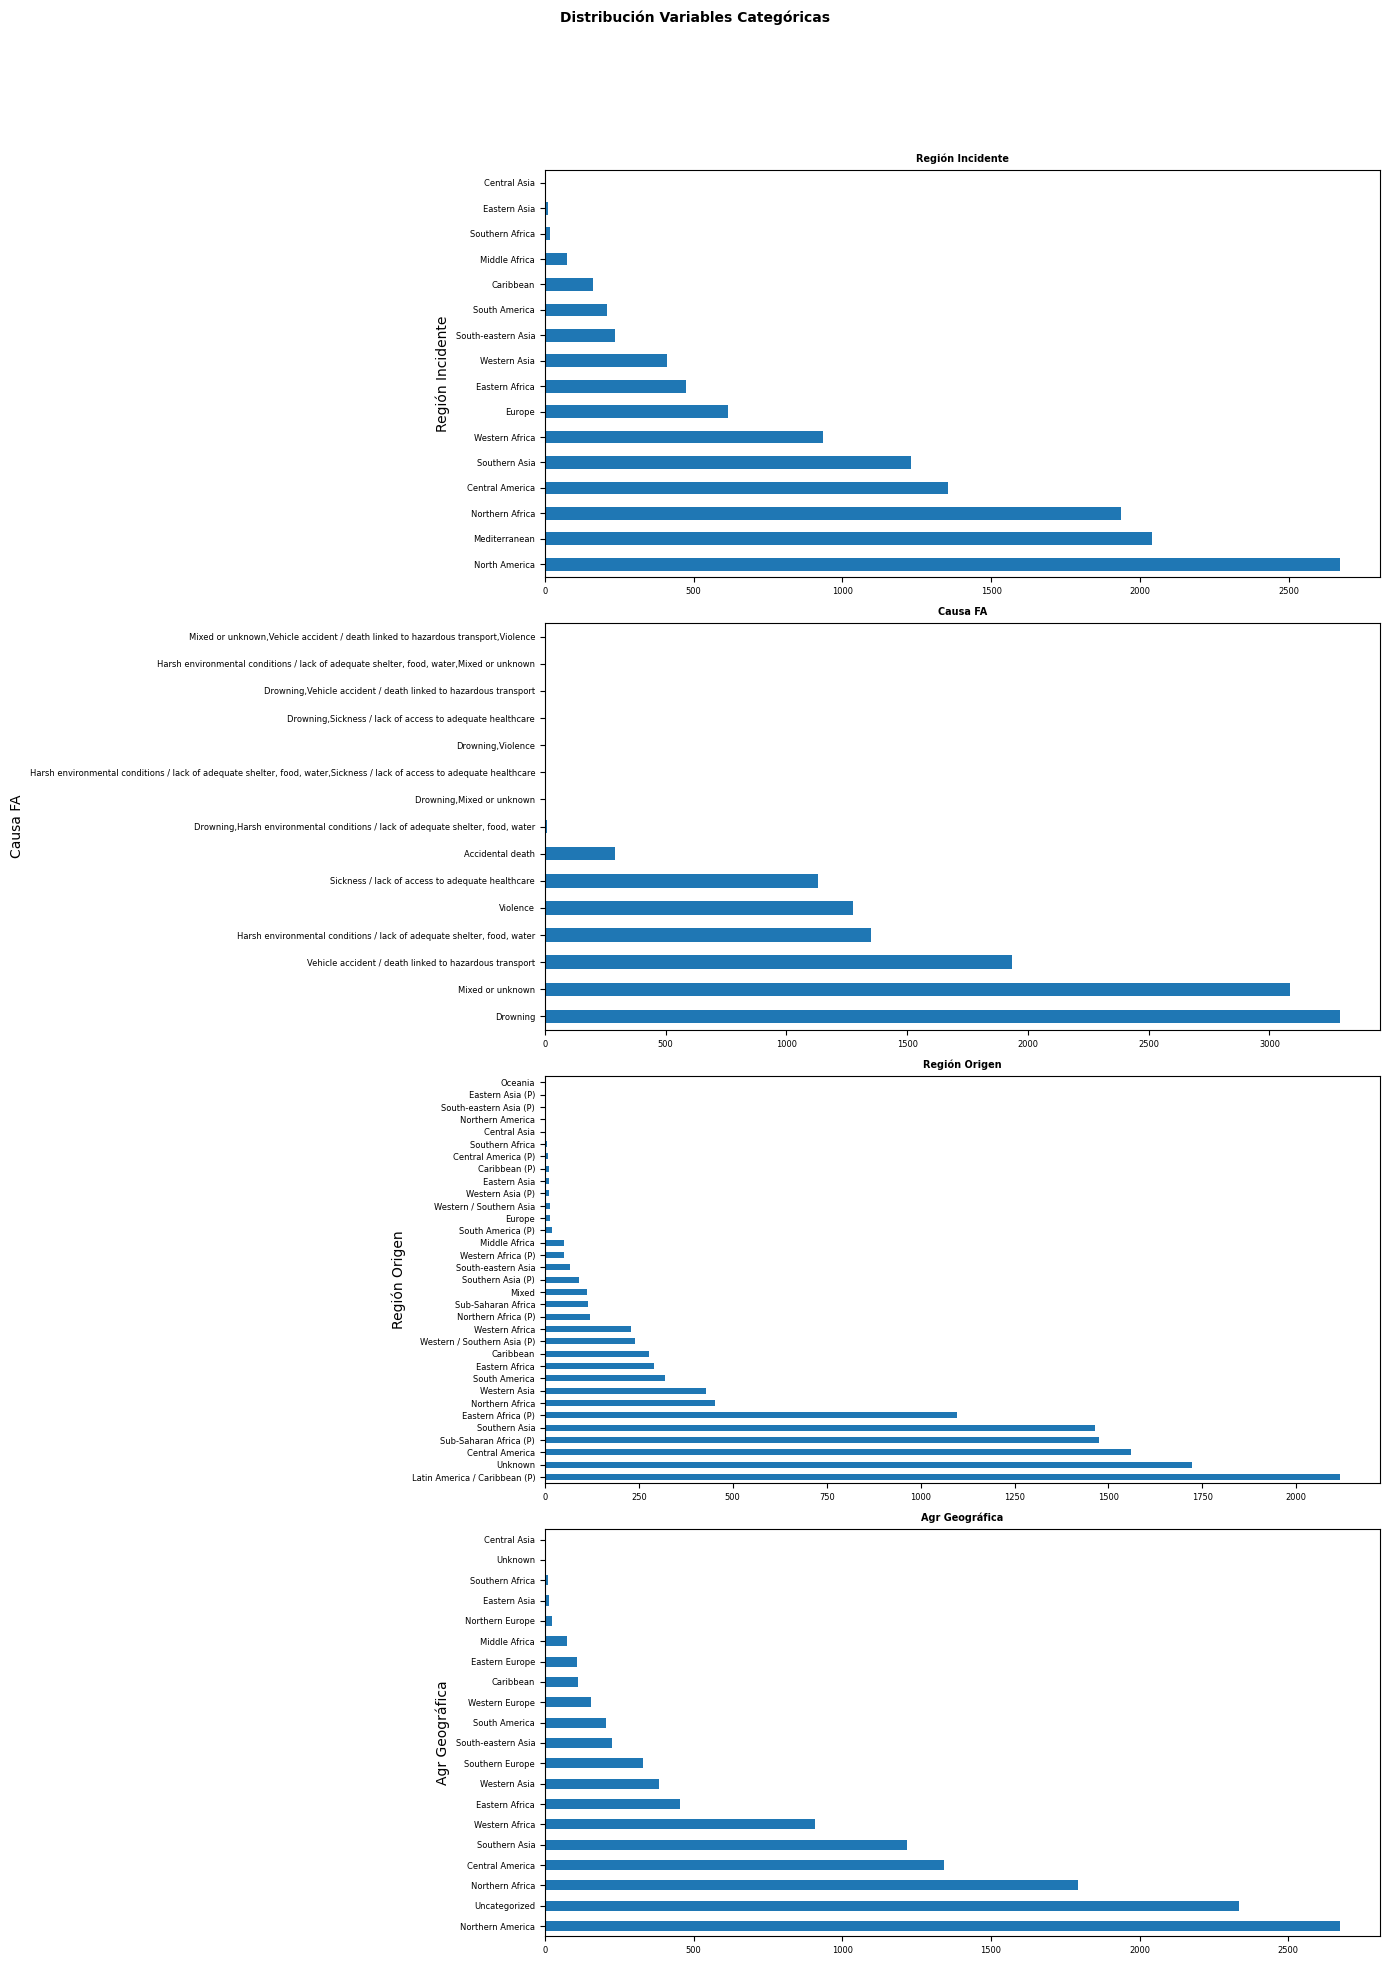

In [226]:
# Gráfico para cuatro variables Categóricas
# ==============================================================================
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 20))
axes = axes.flat
columnas_object = ['Región Incidente', 'Causa FA','Región Origen','Agr Geográfica']
       
for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

    

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución Variables Categóricas',  fontsize = 10, fontweight = "bold");

In [227]:
# Revisamos estadística de datos numéricos
df.describe(include = 'int64').T.style.format(precision=2)

,count,mean,std,min,25%,50%,75%,max
Tipo Incidente,12379.00,1.04,0.23,1.00,1.00,1.00,1.00,5.00
Año Incidente,12379.00,2019.02,2.43,2014.00,2017.00,2019.00,2021.00,2023.00
Mes Reportado,12379.00,6.67,3.35,1.00,4.00,7.00,10.00,12.00
Nro FA,12379.00,2.58,9.77,0.00,1.00,1.00,2.00,750.00
Mín Estimado DES,12379.00,2.00,16.04,0.00,0.00,0.00,0.00,750.00
Nro Total FAyDES,12379.00,4.58,20.44,1.00,1.00,1.00,2.00,1022.00
Nro SOBInc,12379.00,1.77,16.77,0.00,0.00,0.00,0.00,700.00
Nro Mujeres,12379.00,1.50,13.49,0.00,0.00,0.00,1.00,1022.00
Nro Hombres,12379.00,4.61,23.98,0.00,1.00,1.00,1.00,748.00
Nro Niños,12379.00,0.25,2.48,0.00,0.00,0.00,0.00,250.00


In [228]:
df.shape

(12379, 18)

#### Análisis de variables numéricas

### <span style="color:orange">Detección y Tratamiento de valores atípicos (outliers)<span>

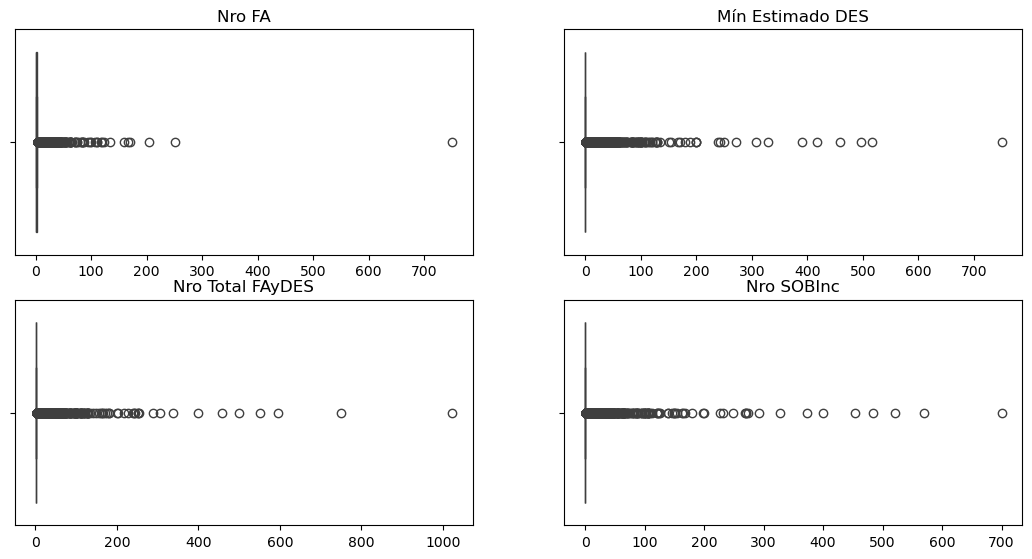

In [229]:
# Funcion que grafica Outliers de columnas numéricas
def Fun_OutliersNumeric(df_name):
    plt.figure(figsize=(13,24))
    for i,j in zip(range(14),['Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOBInc']):
        plt.subplot(7,2,i+1)
        sns.boxplot(x=df_name[j],orient='v')
        plt.title(j)
        plt.xlabel('')


# Invocamos la funcion pasando el dataframe: df
Fun_OutliersNumeric(df)

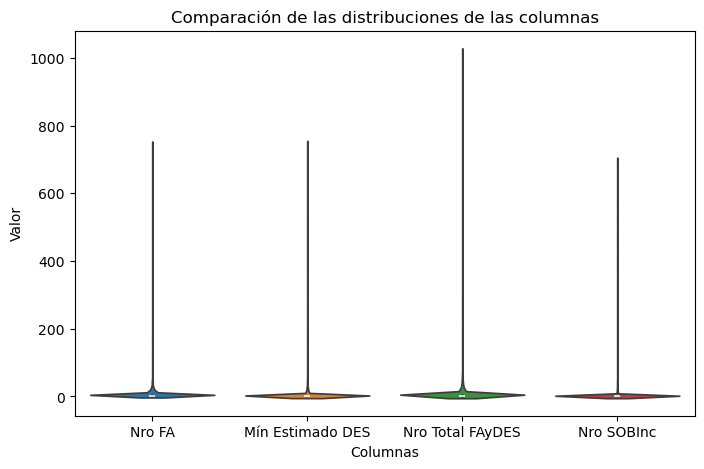

In [230]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(8, 5))

# Crear un gráfico de violín para comparar las distribuciones
sns.violinplot(data=df[['Nro FA', 'Mín Estimado DES', 'Nro Total FAyDES', 'Nro SOBInc']])

# Configuración de etiquetas
plt.title("Comparación de las distribuciones de las columnas")
plt.ylabel('Valor')
plt.xlabel('Columnas')

# Mostrar gráfico
plt.show()

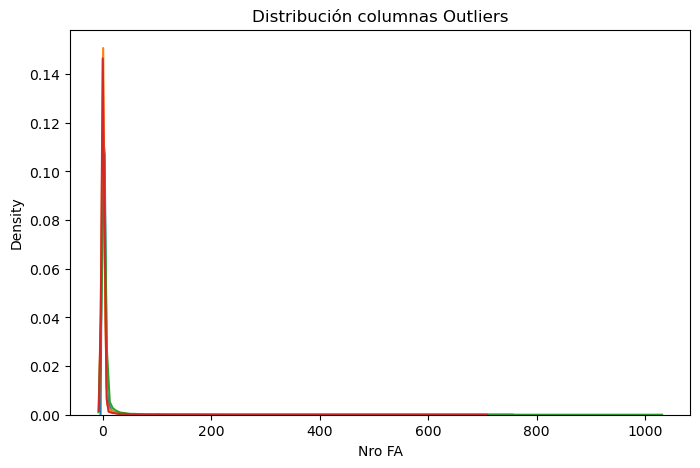

In [231]:
def Fun_DistOutliers(df_name):
    fig, ax1 = plt.subplots(ncols=1, figsize=(8, 5))
    ax1.set_title('Distribución columnas Outliers')
    sns.kdeplot(df['Nro FA'], ax=ax1)
    sns.kdeplot(df['Mín Estimado DES'], ax=ax1)
    sns.kdeplot(df['Nro Total FAyDES'], ax=ax1)
    sns.kdeplot(df['Nro SOBInc'], ax=ax1)

Fun_DistOutliers(df)

#### Evaluamos porcentaje de Outliers sobre el 75% para cada columna a evaluar. Si representan menos del 5% se podría eliminar estos valores. 

In [232]:
# Para cada columna numérica en el DataFrame
percent_outliers_above_75 = {}

for column in ['Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOBInc']:
    # Calcular Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir el límite superior para outliers comunes (más allá del 75%)
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los outliers por encima del límite superior
    outliers_column = df[df[column] > upper_bound]
    
    # Contar los outliers y calcular el porcentaje sobre el total
    num_outliers_above_75 = outliers_column.shape[0]
    total_elements = df[column].shape[0]
    percent_outliers_above_75[column] = f"{(num_outliers_above_75 / total_elements) * 100:.2f}%"

# Mostrar el porcentaje de outliers por encima del 75% en cada columna
print("%Outliers sobre el 75%..")
for column, percent in percent_outliers_above_75.items():
    print(f"{column} : {percent}")

%Outliers sobre el 75%..
Nro FA : 11.78%
Mín Estimado DES : 10.03%
Nro Total FAyDES : 16.67%
Nro SOBInc : 10.48%


##### <span style="color:white"> ¿Qué tan representativa es la Media de estas variables?<span>

In [233]:
# Creamos un DataFrame con el Coeficiente de Variación de variables numéricas
df_cv= df.select_dtypes(include='number').agg(lambda x: x.std() / x.mean(skipna=True) ).rename('Coeficiente_Variación').round(2).reset_index()
df_cv.rename(columns={'index': 'Nom_Variable'}, inplace=True)

# Creamos un DataFrame con la Media de variables numéricas
df_media = df.select_dtypes(include='number').agg(lambda x: x.mean(skipna=True) ).rename('Media').round(2).reset_index()
df_media.rename(columns={'index': 'Nom_Variable'}, inplace=True)

# Unimos ambos DataFrame por columna : Nom_Variable
df_merged = pd.merge(df_cv, df_media, on='Nom_Variable', how='inner') 
df_merged


,Nom_Variable,Coeficiente_Variación,Media
0,Tipo Incidente,0.22,1.04
1,Año Incidente,0.00,2019.02
2,Mes Reportado,0.50,6.67
3,Nro FA,3.78,2.58
4,Mín Estimado DES,8.02,2.00
5,Nro Total FAyDES,4.46,4.58
6,Nro SOBInc,9.47,1.77
7,Nro Mujeres,9.02,1.50
8,Nro Hombres,5.20,4.61
9,Nro Niños,9.96,0.25


##### <span style="color:white">Como el Coeficiente de Variación <= 30% se concluye que la data es homogenea, por tanto, la Media es altamente representativa de los datos. Así que, vamos a usar la media para bajar los valores extremos<span>

In [234]:
outliers_indices = []
for column in ['Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOBInc']:
        print(column)
        z_scores = stats.zscore(df[column])
        outliers_indices.extend(df.index[abs(z_scores) > 3])
        print (df[ [column] ].loc[outliers_indices])

        media = round(np.mean(df[column]),0)
        df.loc[outliers_indices, column] = media
        df[column] = df[column].astype('int64') # transformamos en int64 
        print (df[ [column] ].loc[outliers_indices]) 

Nro FA
       Nro FA
45        251
78         44
94         62
127        45
173       170
...       ...
12550      86
12592      34
12708      50
12790      40
12849      80

[96 rows x 1 columns]
       Nro FA
45          3
78          3
94          3
127         3
173         3
...       ...
12550       3
12592       3
12708       3
12790       3
12849       3

[96 rows x 1 columns]
Mín Estimado DES
       Mín Estimado DES
45                    0
78                   33
94                    0
127                   0
173                  81
...                 ...
10826                70
12454               180
12532                61
12849               516
12886                51

[204 rows x 1 columns]
       Mín Estimado DES
45                    2
78                    2
94                    2
127                   2
173                   2
...                 ...
10826                 2
12454                 2
12532                 2
12849                 2
12886             

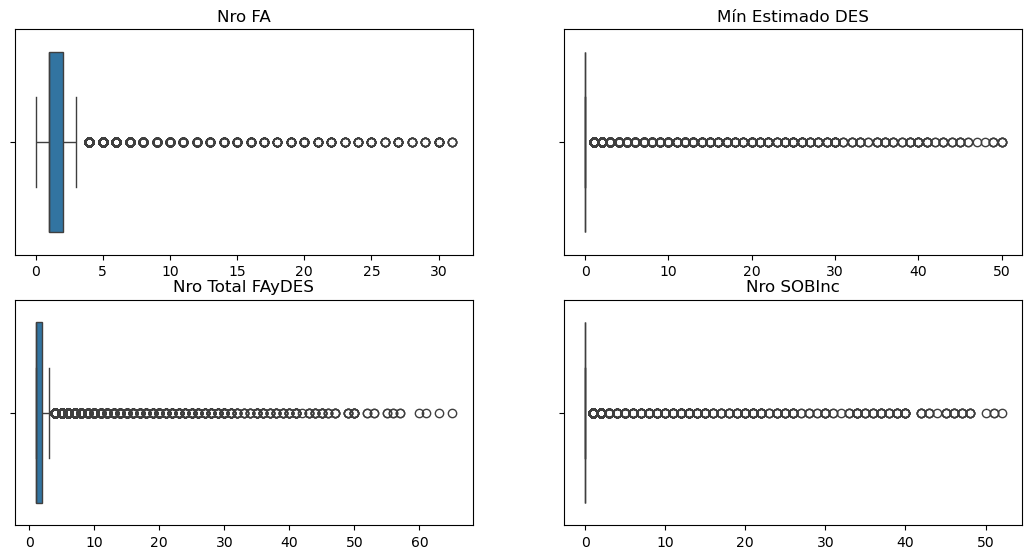

In [236]:
# Volvermos a revisar Outliers de variables numéricas
Fun_OutliersNumeric(df)

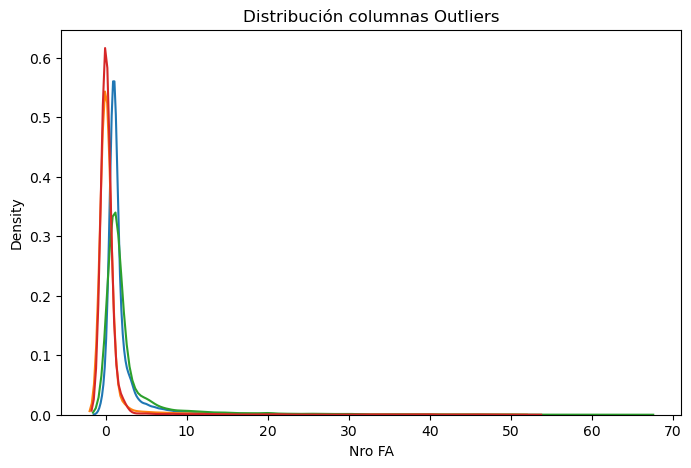

In [237]:
Fun_DistOutliers(df)

#### Se aprecia que siguen habiendo distribución a la izquierda pero bajó el rango de valores extremos

#### <span style="color:orange">Pregunta 1 : ¿Cuál es la principal Causa de Muerte por cada Agrupación Geográfica? <span>

In [238]:
# Para responder esto primero revisamos la frecuencia de columna: Causa FA 
df['Causa FA'].value_counts(sort=True)  

Causa FA
Drowning                                                                                                                   3293
Mixed or unknown                                                                                                           3083
Vehicle accident / death linked to hazardous transport                                                                     1934
Harsh environmental conditions / lack of adequate shelter, food, water                                                     1350
Violence                                                                                                                   1277
Sickness / lack of access to adequate healthcare                                                                           1132
Accidental death                                                                                                            289
Drowning,Harsh environmental conditions / lack of adequate shelter, food, water                

In [239]:
# Revisamos la frecuencia de columna: Agrupación Geográfica
df['Agr Geográfica'].value_counts(sort=True)  

Agr Geográfica
Northern America      2675
Uncategorized         2335
Northern Africa       1794
Central America       1342
Southern Asia         1218
Western Africa         910
Eastern Africa         455
Western Asia           385
Southern Europe        329
South-eastern Asia     224
South America          206
Western Europe         156
Caribbean              113
Eastern Europe         109
Middle Africa           74
Northern Europe         25
Eastern Asia            15
Southern Africa         12
Unknown                  1
Central Asia             1
Name: count, dtype: int64

In [240]:
# Calcular las frecuencias
frecuencias = df.groupby(['Agr Geográfica', 'Causa FA'], observed=True).size().reset_index(name='Frecuencia')

# Encontrar la causa más frecuente por agrupación geográfica
max_frecuencias = frecuencias.loc[frecuencias.groupby('Agr Geográfica', observed=True)['Frecuencia'].idxmax()]

# Ordenar por frecuencia de mayor a menor
max_frecuencias = max_frecuencias.sort_values(by='Frecuencia', ascending=False)
max_frecuencias

,Agr Geográfica,Causa FA,Frecuencia
101,Uncategorized,Drowning,1869
54,Northern America,Mixed or unknown,1418
47,Northern Africa,Mixed or unknown,711
6,Central America,Drowning,579
91,Southern Asia,Vehicle accident / death linked to hazardous t...,479
116,Western Africa,Sickness / lack of access to adequate healthcare,269
125,Western Asia,Violence,215
98,Southern Europe,Vehicle accident / death linked to hazardous t...,114
131,Western Europe,Vehicle accident / death linked to hazardous t...,108
18,Eastern Africa,Mixed or unknown,108


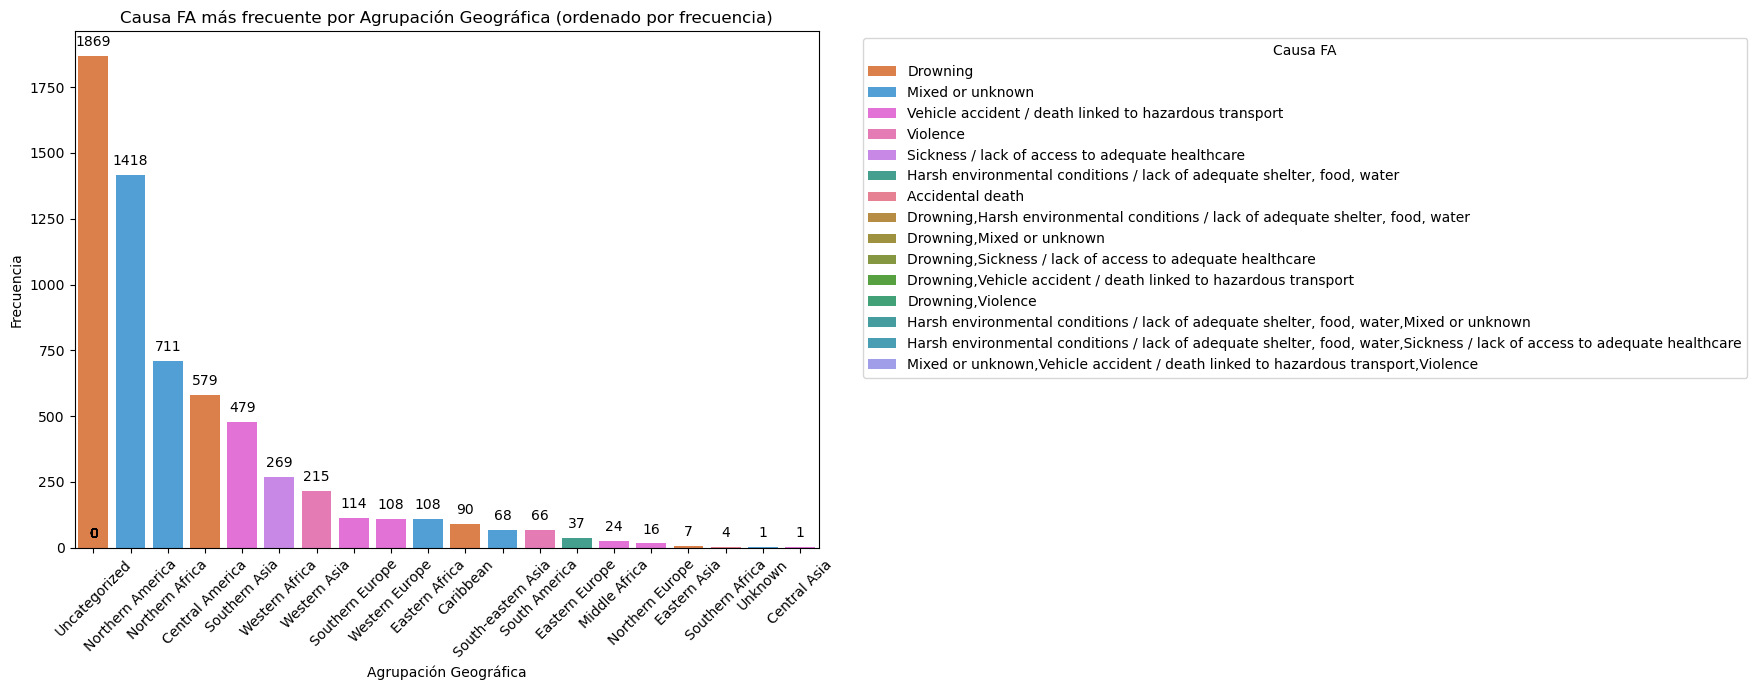

In [241]:
# Definir el orden de las categorías geográficas basado en la frecuencia
orden_geografico = max_frecuencias['Agr Geográfica']


plt.figure(figsize=(18, 7))
ax = sns.barplot(x='Agr Geográfica', y='Frecuencia', hue='Causa FA', data=max_frecuencias, order=orden_geografico, dodge=False)

# Añadir etiquetas de frecuencia
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')



# Ajustar el orden de la leyenda para que coincida con las barras ordenadas
handles, labels = ax.get_legend_handles_labels()
frecuencias_causa = max_frecuencias.groupby('Causa FA')['Frecuencia'].sum().sort_values(ascending=False)
labels_ordenadas = [label for label in frecuencias_causa.index if label in labels]
handles_ordenadas = [handles[labels.index(label)] for label in labels_ordenadas]
ax.legend(handles=handles_ordenadas, labels=labels_ordenadas, title='Causa FA', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title('Causa FA más frecuente por Agrupación Geográfica (ordenado por frecuencia)')
plt.xlabel('Agrupación Geográfica')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [261]:
# Generamos nuevo dataframe con solo variables numéricas
df_int   = df.select_dtypes(include=['int64'])
df_int.columns

Index(['Tipo Incidente', 'Año Incidente', 'Mes Reportado', 'Nro FA',
       'Mín Estimado DES', 'Nro Total FAyDES', 'Nro SOBInc', 'Nro Mujeres',
       'Nro Hombres', 'Nro Niños'],
      dtype='object')

In [262]:
# Definimos una función para graficar la Distribución de las variables numéricas
def Fn_Distribucion(Nrows, Ncols, Data, ListaColumnas, NameDf) :

    fig, axes = plt.subplots(nrows=Nrows, ncols=Ncols, figsize=(10, 6))
    axes = axes.flat
    for i, colum in enumerate(ListaColumnas):
        sns.kdeplot(
            data     = Data,       x        = colum,         fill    = True,
            color   = "blue",      ax      = axes[i]       )
        sns.rugplot(
            data     = Data,          x        = colum,
            color   = "blue",        ax      = axes[i]
        )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    fig.tight_layout()
    plt.subplots_adjust(top = 0.9)
    fig.suptitle('Distribución variables numéricas en : '+NameDf, fontsize = 10, fontweight = "bold");

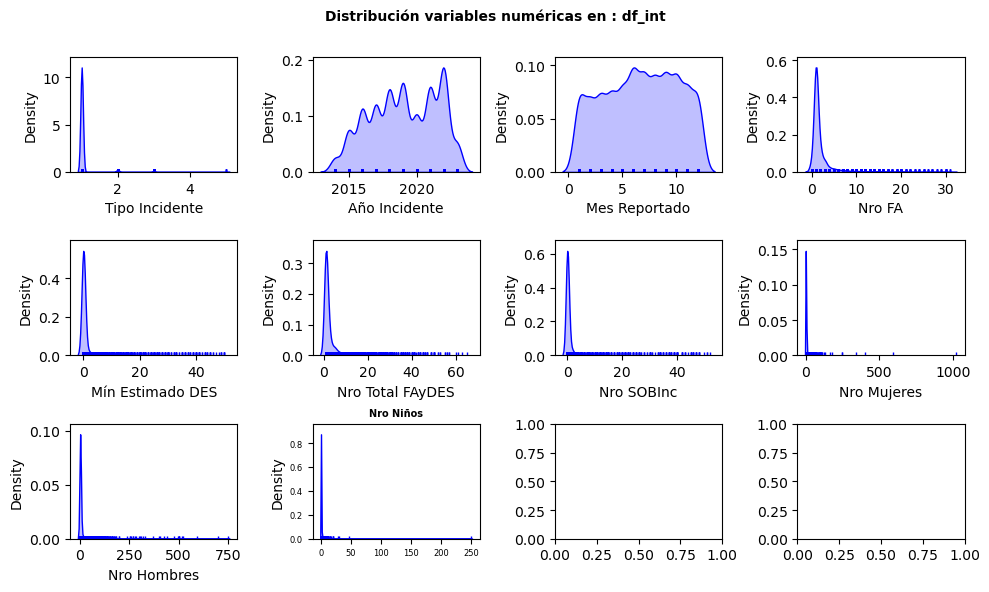

In [245]:
# Graficamos ambos Dataframes y comparamos las distribuciones resultantes
Fn_Distribucion(3, 4, df_int, df_int.columns.tolist(), 'df_int' )

Los filtros se utilizan para elegir un subconjunto de variables relevantes eliminando las que generan ruido antes de correr los modelos.

### Inutilidad

Este criterio consiste en descartar las variables muy concentradas dentro de los datos, las que tiene variabilidad 0 o muy cercana 0.
Esto puede ser útil para mejorar la eficacia de los modelos de ML y reducir el tiempo de entrenamiento al eliminar información redundante.

In [264]:
df_int.std()

Tipo Incidente       0.231037
Año Incidente        2.431388
Mes Reportado        3.350849
Nro FA               3.200245
Mín Estimado DES     4.319398
Nro Total FAyDES     5.604522
Nro SOBInc           3.791558
Nro Mujeres         13.485774
Nro Hombres         23.977869
Nro Niños            2.478167
dtype: float64

Se observa un atributo con una desviación estándar muy pequeña (0 - 0.2), por lo tanto, eliminamos el atributo: Tipo Incidente


In [265]:
df_int.drop(columns=["Tipo Incidente"], inplace=True)

Adicionalmente, por redundancia de información, se opta por eliminar también las columnas: "Nro Mujeres","Nro Hombres" y "Nro Niños" porque esán contenidas implícitamente en otras variables relacionadas como: "Nro Total FAyDES" y "Nro SOBInc". 

In [266]:
df_int.drop(columns=["Nro Mujeres"], inplace=True)
df_int.drop(columns=["Nro Hombres"], inplace=True)
df_int.drop(columns=["Nro Niños"], inplace=True)

Finalmente otras 2 variables candidatas a eliminar son: "Mes Reportado" y "Año Incidente". Ya que al calcular la correlación con una variable relevante del problema, retorna correlación muy baja, esto indicaría que no tienen una relación fuerte con la variable objetivo.

In [267]:
df_int[['Mes Reportado', 'Año Incidente', 'Nro Total FAyDES']].corr()

,Mes Reportado,Año Incidente,Nro Total FAyDES
Mes Reportado,1.000000,-0.108455,0.014509
Año Incidente,-0.108455,1.000000,-0.031782
Nro Total FAyDES,0.014509,-0.031782,1.000000


In [268]:
df_int.drop(columns=["Mes Reportado"], inplace=True)
df_int.drop(columns=["Año Incidente"], inplace=True)

### <span style="color:orange">Matriz de Correlación (sólo con variables importantes para el modelo)<span>

<Axes: >

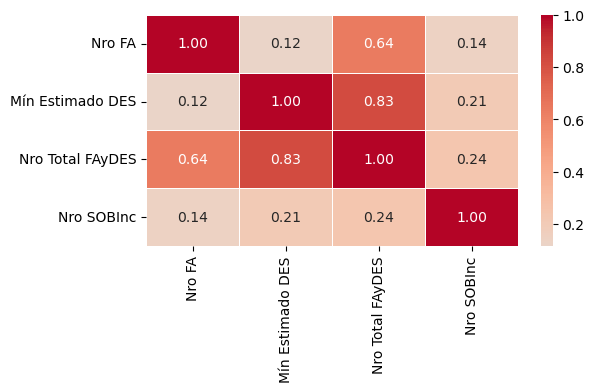

In [269]:
corr_mat = df_int.corr(method='pearson').abs()
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(corr_mat, annot=True,fmt=".2f", linewidth=.5, cmap='coolwarm', center=0)

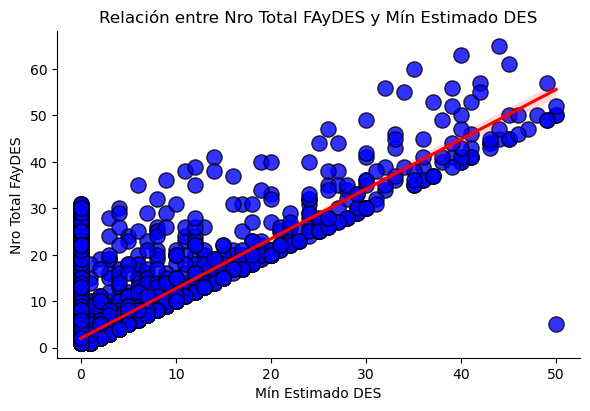

In [272]:
# Graficamos la relación de los 2 variables más correlacionadas
sns.lmplot(data=df, x='Mín Estimado DES', y='Nro Total FAyDES', line_kws={'color': 'r'}, height=4, aspect=1.5, scatter_kws={'s': 120, 'alpha': 0.8, 'color': 'b', 'edgecolor': 'k', 'linewidth': 1} ) 
plt.title('Relación entre Nro Total FAyDES y Mín Estimado DES')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [271]:
# Definir los umbrales para clasificar un incidente como crítico
umbral_fa = 15                 # Umbral para 'Nro FA'
#umbral_total_fa = 4          # Umbral para 'Nro Total FAyDES'
umbral_des = 25            # Umbral para 'Mín Estimado DES'

# Crear la columna 'Incidente Crítico' en df_int
df_int['IncCRIT'] = (
    (df_int['Nro FA'] > umbral_fa) &
    #(df_int['Nro Total FAyDES'] > umbral_total_fa) &
    (df_int['Mín Estimado DES'] > umbral_des)
).astype(int)

Se observa que cuando no hay Desaparecidos ("Min Estimado DES"=0) se tiene distintos rangos de Fallecidos

### <span style="color:orange">Escalado de los datos <span>

Dado que tenemos alta presencia de outliers usaremos RobustScaler(): Escala las columnas según la mediana y los rangos intercuartiles, reduciendo el impacto de los outliers.

In [253]:
columns_to_scale = df_int.columns.tolist() # Pasamos el dataframe a una lista de columnas
scaler = RobustScaler() # Instanciamos el RobustScaler

df_scaled = df_int.copy()  # Creamos una copia del DataFrame original
df_scaled[columns_to_scale] = scaler.fit_transform(df_int[columns_to_scale])

Graficar un 3 variables en 3 clusters

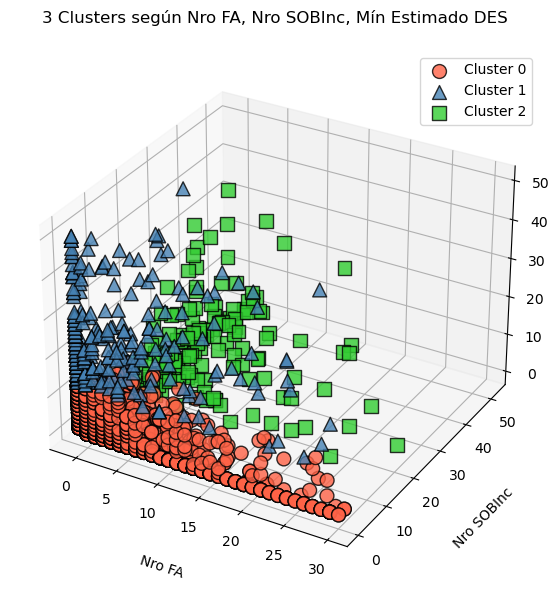

In [254]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

columns_for_clustering = ['Nro FA', 'Nro SOBInc', 'Mín Estimado DES']

# Aplicamos el algoritmo KMeans para 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[columns_for_clustering])

# Configuramos el gráfico 3D con un tamaño más ancho
fig = plt.figure(figsize=(20, 6))  # Aumentamos el ancho del gráfico
ax = fig.add_subplot(111, projection='3d')

# Definimos colores para los clusters
colors = ['#FF6347', '#4682B4', '#32CD32']  # Rojo, Azul y Verde
markers = ['o', '^', 's']  # Marcadores diferentes para cada cluster

# Graficamos los clusters
for cluster in range(3):
    clustered_data = df_scaled[df_scaled['Cluster'] == cluster]
    ax.scatter(clustered_data['Nro FA'], clustered_data['Nro SOBInc'], clustered_data['Mín Estimado DES'], 
               color=colors[cluster], label=f'Cluster {cluster}', 
               s=100, alpha=0.8, edgecolor='k', marker=markers[cluster])  # Tamaño, transparencia, borde y marcador

# Etiquetas y título
ax.set_xlabel('Nro FA', labelpad=15)  # Ajuste de padding para mejor visibilidad
ax.set_ylabel('Nro SOBInc', labelpad=15)  # Ajuste de padding para mejor visibilidad
ax.set_zlabel('Mín Estimado DES', labelpad=15)  # Ajuste de padding para mejor visibilidad

plt.title('3 Clusters según Nro FA, Nro SOBInc, Mín Estimado DES', pad=20)  

plt.legend()
plt.tight_layout()  # Aseguramos que todo el gráfico se ajuste bien en la figura
plt.show()

Creamos una nueva columna para saber si en el incidendente hay sobrevivientes : 1=Si y 0=NO

In [255]:
df_int.describe().T.style.set_properties(**{'background-color': 'black','color': 'white','border-color': 'grey'}).format(precision=2)

,count,mean,std,min,25%,50%,75%,max
Nro FA,12379.00,2.06,3.20,0.00,1.00,1.00,2.00,31.00
Mín Estimado DES,12379.00,0.93,4.32,0.00,0.00,0.00,0.00,50.00
Nro Total FAyDES,12379.00,2.98,5.60,1.00,1.00,1.00,2.00,65.00
Nro SOBInc,12379.00,0.65,3.79,0.00,0.00,0.00,0.00,52.00


In [257]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Supongamos que df_int es tu DataFrame y 'HaySOB' es la columna objetivo
X = df_int.drop(columns=['IncCRIT'])
y = df_int['IncCRIT']

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

# Almacenar los resultados
results = []

# Ejecutar los modelos y obtener métricas
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para ROC AUC
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results)

print(results_df)

                    Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0     Logistic Regression  0.999192   0.800000  0.666667  0.727273  0.999685
1           Decision Tree  0.998384   0.500000  0.500000  0.500000  0.749595
2           Random Forest  0.999461   1.000000  0.666667  0.800000  0.999685
3       Gradient Boosting  0.999461   0.833333  0.833333  0.833333  0.916757
4  Support Vector Machine  0.998384   0.000000  0.000000  0.000000  0.999056
5     k-Nearest Neighbors  0.998654   1.000000  0.166667  0.285714  0.999820


In [258]:
df_int['IncCRIT'].value_counts(sort=True)   

IncCRIT
0    12367
1       12
Name: count, dtype: int64

In [259]:
# Definir umbrales basados en percentiles
percentiles = {
    'Nro FA': {'25%': df_int['Nro FA'].quantile(0.25), '50%': df_int['Nro FA'].quantile(0.50), '75%': df_int['Nro FA'].quantile(0.75)},
    'Nro Total FAyDES': {'25%': df_int['Nro Total FAyDES'].quantile(0.25), '50%': df_int['Nro Total FAyDES'].quantile(0.50), '75%': df_int['Nro Total FAyDES'].quantile(0.75)},
    'Mín Estimado DES': {'25%': df_int['Mín Estimado DES'].quantile(0.25), '50%': df_int['Mín Estimado DES'].quantile(0.50), '75%': df_int['Mín Estimado DES'].quantile(0.75)},
    'Nro SOBInc': {'25%': df_int['Nro SOBInc'].quantile(0.25), '50%': df_int['Nro SOBInc'].quantile(0.50), '75%': df_int['Nro SOBInc'].quantile(0.75)}
}

# Definir las ponderaciones para cada característica
pesos = {
    'Nro FA': 0.4,  # Peso asignado a 'Nro FA'
    'Nro Total FAyDES': 0.3,  # Peso asignado a 'Nro Total FAyDES'
    'Mín Estimado DES': 0.2,  # Peso asignado a 'Mín Estimado DES'
    'Nro SOBInc': 0.1  # Peso asignado a 'Nro SOBInc'
}

# Crear una función para calcular el score de criticidad basado en las ponderaciones y umbrales
def calcular_criticidad(row):
    score = 0
    
    # Añadir contribuciones ponderadas al score
    score += pesos['Nro FA'] * (1 if row['Nro FA'] > percentiles['Nro FA']['50%'] else 0)
    score += pesos['Nro Total FAyDES'] * (1 if row['Nro Total FAyDES'] > percentiles['Nro Total FAyDES']['50%'] else 0)
    score += pesos['Mín Estimado DES'] * (1 if row['Mín Estimado DES'] > percentiles['Mín Estimado DES']['50%'] else 0)
    score += pesos['Nro SOBInc'] * (1 if row['Nro SOBInc'] < percentiles['Nro SOBInc']['50%'] else 0)  # Ponderar menos sobrevivientes
    
    # Clasificar según el score total
    if score >= 0.7:
        return 'Alta'
    elif score >= 0.4:
        return 'Media'
    else:
        return 'Baja'

# Aplicar la función para crear la nueva columna 'CriticidadINC'
df_int['CriticidadINC'] = df_int.apply(calcular_criticidad, axis=1)

df_int['IncCRIT'].value_counts(sort=True)   
# Mostrar los primeros registros para verificar
#print(df_int[['Nro FA', 'Nro Total FAyDES', 'Mín Estimado DES', 'Nro SOBInc', 'CriticidadINC']].head())

IncCRIT
0    12367
1       12
Name: count, dtype: int64

### Cross Validation (hasta 5)  KFold y LOOCV

### GreedSearchCV

#### HalvingGreedSearchCV VER ultima clase